# Case Study: FODO Cell

We will use FODO cell, with thin length Quadrupoles and small angle approximation for dipoles to illustrate various concepts of transverse dynamics.

In [7]:
import matplotlib.pyplot as plt
%matplotlib ipympl
import numpy as np
import sympy
sympy.init_printing(use_unicode=True)
plt.rcParams.update({'font.size': 16})

## Transfer Matrix of FODO cell

FODO cell is a type of widely used cell of magnets.  It consist of only two quadrupoles and two dipoles or simply drifts between quads.  To make a symmetric cell, we use the following sequence:

$$\frac{1}{2}\text{QF}-\text{O}-\text{QD}-\text{O}-\frac{1}{2}\text{QF}$$


We use the following approximation:
* Small bending angle approximation: the transfer matrix for a dipole reduces to a drift space, the space between quads are same, which is $L_1$
* Short quadrupole approximation, so that the quad can be modeled by its focusing length $f$
* Focusing length and defocusing length are same.

Then the matrix is

\begin{equation}
M_{FODO}=
\left(\begin{array}{cc}
1 & 0\\
-\frac{1}{2f} & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & L_1\\
0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & 0\\
\frac{1}{f} & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & L_1\\
0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & 0\\
-\frac{1}{2f} & 1
\end{array}\right)
\end{equation}

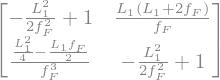

In [4]:
l,f,ff,fd,a=sympy.symbols(r"L_1,f,f_F,f_D,\alpha")
def mat_q(f):
    return sympy.Matrix([[1,0],[1/f,1]])
def mat_d(d):
    return sympy.Matrix([[1,d],[0,1]])
mat_fodo=sympy.simplify(mat_q(-2*ff)*mat_d(l)*mat_q(fd)*mat_d(l)*mat_q(-2*ff))
mat_fodo.subs(fd, ff)

The transfer matrix to/from the mid-point of the focusing quad is 
\begin{equation}
M_{FODO}=
\left(\begin{matrix}- \frac{L_{1}^{2}}{2 f^{2}} + 1 & \frac{L_{1}}{f} \left(L_{1} + 2 f\right)\\\frac{L_{1}}{4 f^{3}} \left(L_{1} - 2 f\right) & - \frac{L_{1}^{2}}{2 f^{2}} + 1\end{matrix}\right)
\end{equation}

The determinant of the matrix is always 1.  The trace of the FODO cell is 
$2- \frac{L_{1}^{2}}{ f^{2}} $.  





The starting point can be choose arbitrarily.  If we use the midpoint of the defocusing quad:

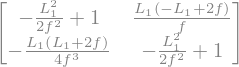

In [5]:
mat_fodo_2=sympy.simplify(mat_q(2*f)*mat_d(l)*mat_q(-f)*mat_d(l)*mat_q(2*f))
mat_fodo_2

The transfer matrix becomes:
\begin{equation}
M_{FODO,midQD}=
\left(\begin{matrix}- \frac{L_{1}^{2}}{2 f^{2}} + 1 & \frac{L_{1}}{f} \left(- L_{1} + 2 f\right)\\- \frac{L_{1}}{4 f^{3}} \left(L_{1} + 2 f\right) & - \frac{L_{1}^{2}}{2 f^{2}} + 1\end{matrix}\right)
\end{equation}

The trace remain unchanged.

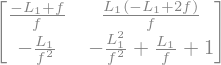

In [6]:
mat_fodo_3=sympy.simplify(mat_d(0)*mat_q(f)*mat_d(l)*mat_q(-f)*mat_d(l))
mat_fodo_3

If we set the starting point right after the focusing quadrupole, the matrix becomes
\begin{equation}
M_{FODO,afterQF}=
\left(\begin{matrix}\frac{1}{f} \left(- L_{1} + f\right) & \frac{L_{1}}{f} \left(- L_{1} + 2 f\right)\\- \frac{L_{1}}{f^{2}} & - \frac{L_{1}^{2}}{f^{2}} + \frac{L_{1}}{f} + 1\end{matrix}\right)
\end{equation}

Again the trace remain unchanged.  That is a natural result since trace of the product of matrices is an invariant under cyclic permutation.

## FODO cell in repeating structure

To use the FODO cell many time in a repeating structure, the trace has to be larger than $-2$.  Therefore:

$$- \frac{L_{1}^{2}}{2 f^{2}} + 1 > -1 $$
which reduces to:

$$L_1<2f$$

Then we can get the optics parameters of the one-turn matrix:

$$
M=\left(\begin{array}{cc}
\cos\Phi+\alpha\sin\Phi & \beta\sin\Phi\\
-\gamma\sin\Phi & \cos\Phi-\alpha\sin\Phi
\end{array}\right)
$$

Then the betatron phase advance can be calculated from:
\begin{equation}
\cos{\Phi}=\frac{1}{2}\operatorname{tr}(M)=1-\frac{L_1^2}{2f^2}
\end{equation}

or 
\begin{equation}
\sin{\frac{\Phi}{2}}=\frac{L_1}{2f}
\end{equation}

The trace is an invariant under changing the starting piont, so does the phase advance.

The optical function can be calculated at different locations by:
\begin{align}
\beta  &= \frac{M_{12}}{\sin\Phi}\\
\alpha &= \frac{M_{11}-M_{22}}{2\sin\Phi}
\end{align}

At the middle point of the QD or QF we have:
\begin{align}
\beta_{F/D}  &= \frac{2L_1\left(1\pm\sin(\Phi/2)\right)}{\sin\Phi}\\
\alpha &= 0
\end{align}

Right after the focusing quad, we have:
\begin{align}
\beta  &= \frac{2L_1\left(1-\sin(\Phi/2)\right)}{\sin\Phi}\\
\alpha &= \frac{L_1}{f}\frac{\sin(\Phi/2)-1}{\sin\Phi}
\end{align}

## Dispersion in FODO cells

Let's consider the FODO cells with small bending angle approximation, starting from the mid point of the focusing quad.  The extended $3\times 3$ matrix $\mathcal{M}$ gives

\begin{equation}
\mathcal{M}_{FODO}=
\left(\begin{array}{cc}
1 & 0 & 0\\
-\frac{1}{2f} & 1 & 0\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & L_1 & L_1 \theta/2\\
0 & 1 & \theta \\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & 0 & 0\\
\frac{1}{f} & 1 & 0\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & L_1 & L_1 \theta/2\\
0 & 1 & \theta \\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc}
1 & 0 & 0\\
-\frac{1}{2f} & 1 & 0\\
0 & 0 & 1
\end{array}\right)
\end{equation}

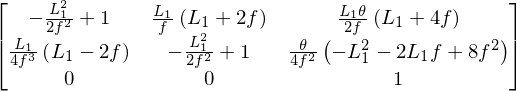

In [7]:
t=sympy.symbols("\\theta")
def matd_q(f):
    return sympy.Matrix([[1,0,0],[1/f,1,0],[0,0,1]])
def matd_d(d, ang):
    return sympy.Matrix([[1,d,d*ang/2],[0,1,ang],[0,0,1]])
mat_fodo=sympy.simplify(matd_q(-2*f)*matd_d(l,t)*matd_q(f)*matd_d(l,t)*matd_q(-2*f))
mat_fodo

The matrix $\mathcal{M}$ of FODO cell gives
\begin{equation}
\mathcal{M}_{FODO}=
\left(\begin{matrix}- \frac{L_{1}^{2}}{2 f^{2}} + 1 & \frac{L_{1}}{f} \left(L_{1} + 2 f\right) & \frac{L_{1} \theta}{2 f} \left(L_{1} + 4 f\right)\\\frac{L_{1}}{4 f^{3}} \left(L_{1} - 2 f\right) & - \frac{L_{1}^{2}}{2 f^{2}} + 1 & \frac{\theta}{4 f^{2}} \left(- L_{1}^{2} - 2 L_{1} f + 8 f^{2}\right)\\0 & 0 & 1\end{matrix}\right)
\end{equation}

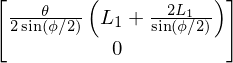

In [8]:
s=sympy.symbols('\sin(\phi/2)')
sympy.simplify(sympy.Inverse(sympy.eye(2)-mat_fodo[:2,:2])*mat_fodo[:2,2]).subs(f, l/2/s)



The dispersion function in periodical boundary condition gives:
\begin{equation}
\left(\begin{array}{c}
D\\
D'
\end{array}\right) _{midQF}= 
\left(\begin{matrix}\frac{L_1\theta}{2 \sin(\Phi/2)} \left(1 + \frac{2}{\sin(\Phi/2)}\right)\\0\end{matrix}\right)
\end{equation}

One can easily get the dispersion function at the middle point of the defocusing quad as: 
\begin{equation}
\left(\begin{array}{c}
D\\
D'
\end{array}\right)_{midQD} = 
\left(\begin{matrix}\frac{L_1\theta}{2 \sin(\Phi/2)} \left(-1 + \frac{2}{\sin(\Phi/2)}\right)\\0\end{matrix}\right)
\end{equation}

With the choice of the phase advance, the maximum and minimum of the beta function and dispersion functions can be optimized base on the requirements.

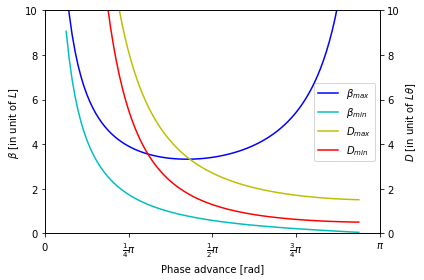

In [9]:
epsilon=0.2
phi=np.linspace(epsilon,np.pi-epsilon,100)
beta_max=2*(1+np.sin(phi/2))/np.sin(phi)
eta_max=(np.sin(phi/2)+2)/2/np.sin(phi/2)/np.sin(phi/2)
beta_min=2*(1-np.sin(phi/2))/np.sin(phi)
eta_min=(-np.sin(phi/2)+2)/2/np.sin(phi/2)/np.sin(phi/2)
fig,ax=plt.subplots()
ax_m=ax.twinx()
ax.set_xlabel("Phase advance [rad]")
ax.set_ylabel(r"$\beta$ [in unit of $L$]")
ax_m.set_ylabel(r"$D$ [in unit of $L\theta$]")
ax.set_ylim(0,10)
ax.set_xlim(0,np.pi)
ax_m.set_ylim(-0,10)
l1=ax.plot(phi,beta_max,c='b',label=r'$\beta_{max}$')
l2=ax.plot(phi,beta_min,c='c',label=r'$\beta_{min}$')
l3=ax_m.plot(phi,eta_max, c='y', label=r'$D_{max}$')
l4=ax_m.plot(phi,eta_min, c='r', label=r'$D_{min}$')
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='right')
ax.set_xticks(np.linspace(0,1,5,)*np.pi)
ax.set_xticklabels(["$0$", r"$\frac{1}{4}\pi$", r"$\frac{1}{2}\pi$",
                    r"$\frac{3}{4}\pi$", r"$\pi$",
                     ])

fig.tight_layout()

## Chromaticity of FODO cell

The natural chromaticity of this lattice has contributions from the two thin quadrupoles
\begin{align}
C_x&=-\frac{1}{4\pi}\int\beta_x K_x ds \\
&=-\frac{1}{4\pi f}\left(\beta_{max} - \beta_{min}\right) \\
&=-\frac{\tan(\Phi/2)}{\pi} \\
&=-\frac{\tan(\Phi/2)}{\Phi/2} \nu_x
\end{align}


## $\mathcal{H}$ function in FODO cell

We have optics at the middle of QF and QD
\begin{align}
\beta_{F/D}  &= \frac{2L_1\left(1\pm\sin(\Phi/2)\right)}{\sin\Phi}\\
D_{F/D} &= \frac{L_1\theta}{2 \sin(\Phi/2)} \left( \pm 1 + \frac{2}{\sin(\Phi/2)}\right)
\end{align}

Therefore the $\mathcal{H}$ at these two location gives:

\begin{align}
\mathcal{H}_{F/D} &= \frac{L\theta^2 \cos(\Phi/2)}{\sin^3(\Phi/2)\left(1\pm\sin(\Phi/2) \right)}
\left(1\pm\frac{1}{2}\sin\frac{\Phi}{2}\right)^2
\end{align}

Let's replace the integral with the average of the value at both end of the dipole.
\begin{align}
\rho\frac{I_5}{I_2} &= \rho\frac{\oint\frac{\mathcal{H}}{\rho^3}ds}{\oint\frac{1}{\rho^2}ds} \\
&=\frac{1}{2}\left({\mathcal{H}_{F}+\mathcal{H}_{D}}\right) \\
&=\frac{\rho\theta^3 \cos(\Phi/2)}{2\sin^3(\Phi/2)}
\left(\frac{\left(1+\frac{1}{2}\sin\frac{\Phi}{2}\right)^2}{\left(1+\sin(\Phi/2) \right)}+
\frac{\left(1-\frac{1}{2}\sin\frac{\Phi}{2}\right)^2}{\left(1-\sin(\Phi/2) \right)}\right) \\
&=\rho\theta^3\frac{ \cos(\Phi/2)}{\sin^3(\Phi/2)\cos(\Phi/2)}\left(1-\frac{3}{4}\sin^2\frac{\Phi}{2}\right)
\end{align}



The maxmumum, minimum $\mathcal{H}$ function and the approximated $\mathcal{H}$ in dipoles are also functions of the phase advance of the FODO cell.

138.39385343374136 1.18777034003462


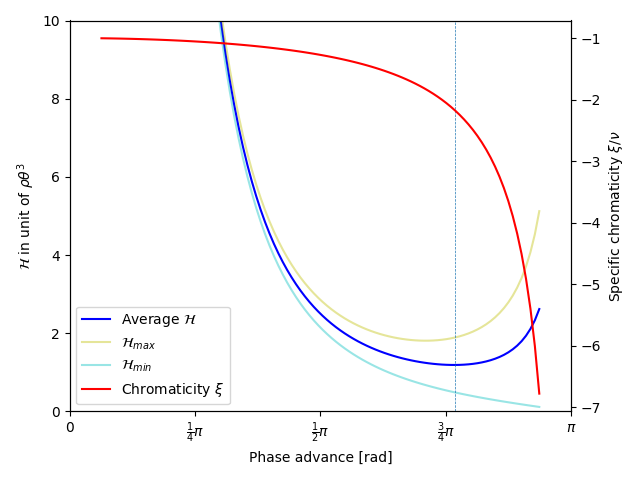

In [6]:
epsilon=0.2
phi=np.linspace(epsilon,np.pi-epsilon,100)
beta_max=2*(1+np.sin(phi/2))/np.sin(phi)
eta_max=(np.sin(phi/2)+2)/2/np.sin(phi/2)/np.sin(phi/2)
beta_min=2*(1-np.sin(phi/2))/np.sin(phi)
eta_min=(np.sin(phi/2)-2)/2/np.sin(phi/2)/np.sin(phi/2)

H_min=eta_max*eta_max/beta_max
H_max=eta_min*eta_min/beta_min


    
loc=np.argmin(H_max+H_min)
print(phi[loc]/np.pi*180, (H_max+H_min)[loc]/2)
chrom=-np.tan(phi/2.0)/(phi/2.0)

fig,ax=plt.subplots()
ax_m=ax.twinx()
ax.set_xlabel("Phase advance [rad]")
ax.set_ylabel(r"$\mathcal{H}$ in unit of $\rho \theta^3$")
ax_m.set_ylabel(r"Specific chromaticity $\xi/\nu$")
ax.set_ylim(0,10)
ax.set_xlim(0,np.pi)
#ax_m.set_ylim(-10,10)
l1=ax.plot(phi,(H_max+H_min)/2.0, c='b', label=r'Average $\mathcal{H}$')
l2=ax.plot(phi,H_max,c='y',label=r'$\mathcal{H}_{max}$', alpha=0.4)
l3=ax.plot(phi,H_min,c='c',label=r'$\mathcal{H}_{min}$', alpha=0.4)
l4=ax_m.plot(phi,chrom, c='r', label=r'Chromaticity $\xi$')
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=3)
ax.set_xticks(np.linspace(0,1,5,)*np.pi)
ax.set_xticklabels(["$0$", r"$\frac{1}{4}\pi$", r"$\frac{1}{2}\pi$",
                    r"$\frac{3}{4}\pi$", r"$\pi$",
                     ])
ax.axvline(x=phi[loc], ls='--', lw=.5)

labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=3)
fig.tight_layout()
